In [ ]:
#实验2.4 预测相应年份的麻疹疫苗接种率
#采用函数和类两个方法实现

In [1]:
#第一个方法，函数方法————————————————————————————————————————————————————
import pandas as pd
import mindspore as ds
import matplotlib.pyplot as plt
import numpy
df=pd.read_csv('course-6-vaccine.csv')
df.head()

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892


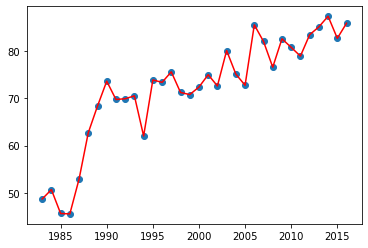

In [2]:
x=df['Year']
y=df['Values']
x_new=[]
y_new=[]
for i in x:
    x_new.append(i)
x=ds.numpy.array(x_new).asnumpy()
for i in y:
    y_new.append(i)
y=ds.numpy.array(y_new).asnumpy()
plt.plot(x,y,'r')
plt.scatter(x,y)

In [3]:
#划分数据集
train_df=df[:int(len(df)*0.7)]
test_df=df[int(len(df)*0.7):]
X_train =train_df['Year'].values
y_train=train_df['Values'].values
X_test=test_df['Year'].values
y_test=test_df['Values'].values

In [4]:
#线性回归预测
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train.reshape(len(X_train),1),y_train.reshape(len(y_train),1))
results=model.predict(X_test.reshape(len(X_test),1))
results

array([[81.83437635],
       [83.09935437],
       [84.36433239],
       [85.62931041],
       [86.89428843],
       [88.15926645],
       [89.42424447],
       [90.68922249],
       [91.95420051],
       [93.21917853],
       [94.48415655]])

In [5]:
#计算平均绝对误差和均方误差
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('线性回归平均绝对误差',mean_absolute_error(y_test,results.flatten()))
print('线性回归均方误差',mean_squared_error(y_test,results.flatten()))


线性回归平均绝对误差 6.011979515629812
线性回归均方误差 43.531858295153434


In [6]:
#利用二次多项式线性回归进行预测
from sklearn.preprocessing import PolynomialFeatures
#计算二次多项式特征矩阵
poly_features_2=PolynomialFeatures(degree=2,include_bias=False)
poly_X_train_2=poly_features_2.fit_transform(X_train.reshape(len(X_train),1))
poly_X_test_2=poly_features_2.fit_transform(X_test.reshape(len(X_test),1))

In [7]:
model=LinearRegression()
model.fit(poly_X_train_2,y_train.reshape(len(X_train),1))
results_2=model.predict(poly_X_test_2)
results_2.flatten()

array([71.98010746, 70.78151826, 69.38584368, 67.79308372, 66.00323838,
       64.01630767, 61.83229158, 59.45119011, 56.87300326, 54.09773104,
       51.12537344])

In [8]:
#计算二次多项式线性回归平均绝对误差和均方误差

print('二次多项式线性回归平均绝对误差',mean_absolute_error(y_test,results_2.flatten()))
print('二次多项式线性回归均方误差',mean_squared_error(y_test,results_2.flatten()))


二次多项式线性回归平均绝对误差 19.792070829567653
二次多项式线性回归均方误差 464.3290384751541


In [9]:
#3、4、5次回归的误差
from sklearn.pipeline import make_pipeline
X_train=X_train.reshape(len(X_train),1)
X_test=X_test.reshape(len(X_test),1)
y_train=y_train.reshape(len(y_train),1)

In [10]:
for m in [3,4,5]:
    model=make_pipeline(PolynomialFeatures(m,include_bias=False),LinearRegression())
    model.fit(X_train,y_train)

    pre_y=model.predict(X_test)
    print('{}次多项式线性回归平均绝对误差'.format(m), mean_absolute_error(y_test, pre_y.flatten()))
    print('{}次多项式线性回归均方误差'.format(m), mean_squared_error(y_test, pre_y.flatten()))


3次多项式线性回归平均绝对误差 4.547691928062872
3次多项式线性回归均方误差 29.93305654903162
4次多项式线性回归平均绝对误差 4.424336229004736
4次多项式线性回归均方误差 29.0287490291125
5次多项式线性回归平均绝对误差 4.341616357696082
5次多项式线性回归均方误差 28.221927572277085


Text(0, 0.5, 'MSE')

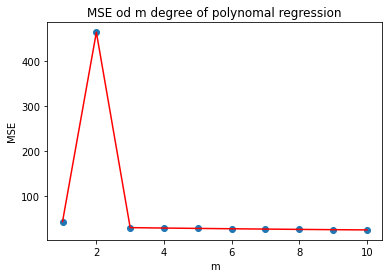

In [11]:
#绘制均方误差随多项式次数的增加的变化曲线
mse=[]
m=1
m_max=10
while m<=m_max:
    model=make_pipeline(PolynomialFeatures(m,include_bias=False),LinearRegression())
    model.fit(X_train, y_train)

    pre_y = model.predict(X_test)
    mse.append(mean_squared_error(y_test, pre_y.flatten()))
    m=m+1

plt.plot([i for i in range(1,m_max+1)],mse,'r')
plt.scatter([i for i in range(1,m_max+1)],mse)
plt.title("MSE od m degree of polynomal regression")
plt.xlabel('m')
plt.ylabel('MSE')

In [ ]:
#第二个方法，类方法————————————————————————————————————————————————————

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy

In [13]:
class vaccine():
    def __init__(self,path):
        self.df=pd.read_csv(path)
        self.df.describe()
        self.x=self.df['Year']
        self.y=self.df['Values']
        
    def split(self,split_num):
        """
        划分数据集
        """
        split_num=int(len(self.x)*split_num)
        
        self.X_train=self.x[:split_num]
        self.y_train=self.y[:split_num]

        self.X_test=self.x[split_num:]
        self.y_test=self.y[split_num:]x     
        
    def pred(self,m):
        """
        预测
        """
        model=make_pipeline(PolynomialFeatures(m,include_bias=False),LinearRegression())
        model.fit(numpy.array(self.X_train).reshape(-1,1), self.y_train)

        self.pre_y = model.predict(numpy.array(self.X_test).reshape(-1,1))

        return self.pre_y
    
    def mae_value(self):
        """
        平均绝对误差函数
        """
        return mean_absolute_error(self.y_test, self.pre_y.flatten())
    
    def mse_value(self):
        """
        均分误差函数
        """
        return mean_squared_error(self.y_test, self.pre_y.flatten())
    

In [14]:
vaccine_class=vaccine('course-6-vaccine.csv')
vaccine_class.split(0.7)
y=vaccine_class.pred(3)
print(y)
print(vaccine_class.mae_value())
print(vaccine_class.mse_value())

[74.89447365 75.15306775 75.50601316 75.97572803 76.58463063 77.35513911
 78.30967173 79.47064666 80.86048211 82.50159629 84.41640741]
4.547691928062872
29.93305654903162
